In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Network_logs.csv")

In [3]:
df.head()

,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,0,Normal
1,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,1,BotAttack
2,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,0,Normal
3,192.168.30.40,130.169.82.211,25,HTTPS,TCP,666,Mozilla/5.0,Success,0,Normal
4,192.168.43.179,35.140.102.220,22,FTP,TCP,2821,Mozilla/5.0,Success,0,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8846 entries, 0 to 8845
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Source_IP       8846 non-null   object
 1   Destination_IP  8846 non-null   object
 2   Port            8846 non-null   int64 
 3   Request_Type    8846 non-null   object
 4   Protocol        8846 non-null   object
 5   Payload_Size    8846 non-null   int64 
 6   User_Agent      8846 non-null   object
 7   Status          8846 non-null   object
 8   Intrusion       8846 non-null   int64 
 9   Scan_Type       8846 non-null   object
dtypes: int64(3), object(7)
memory usage: 691.2+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [23]:
df1 = df.copy()
df1 = df1.drop(columns=['User_Agent','Scan_Type'])
df1['Status'] = df1['Status'].replace('Success',1)
df1['Status'] = df1['Status'].replace('Failure',0)
df1.head()

/var/folders/wc/qr_zrnmn0fgg5xq03fx849c00000gn/T/ipykernel_84015/3296981199.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Status'] = df1['Status'].replace('Failure',0)


,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,Status,Intrusion
0,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,1,0
1,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,0,1
2,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,1,0
3,192.168.30.40,130.169.82.211,25,HTTPS,TCP,666,1,0
4,192.168.43.179,35.140.102.220,22,FTP,TCP,2821,1,0


/var/folders/wc/qr_zrnmn0fgg5xq03fx849c00000gn/T/ipykernel_84015/1910322537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Payload_Size'],kde=True)


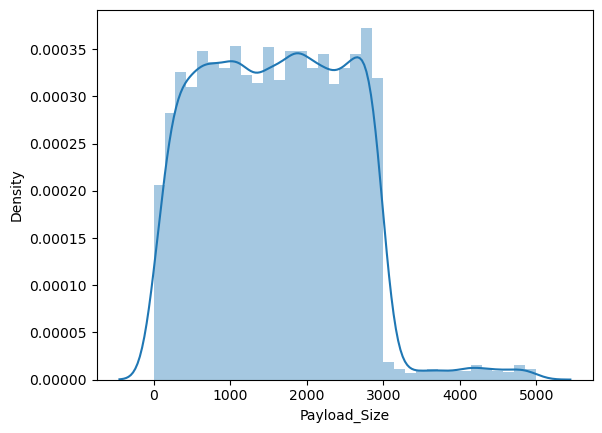

In [24]:
sns.distplot(df1['Payload_Size'],kde=True)
plt.show()

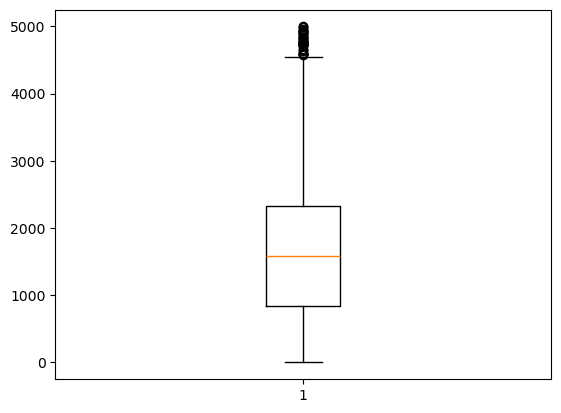

In [25]:
plt.boxplot(df1['Payload_Size'])
plt.show()

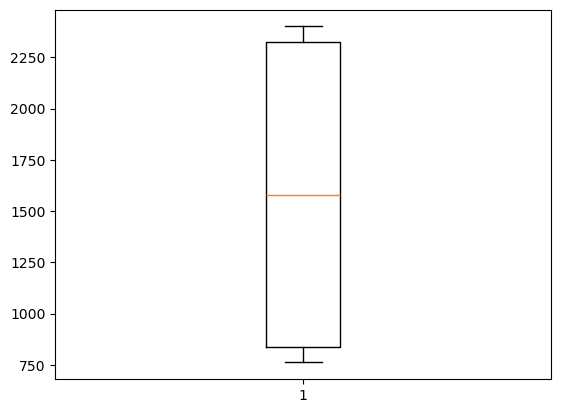

In [26]:
from feature_engine.outliers import Winsorizer
a = Winsorizer(capping_method='iqr',tail = 'both', fold=0.05, variables=['Payload_Size'])
df1 = a.fit_transform(df1)
plt.boxplot(df1['Payload_Size'])
plt.show()

In [29]:
from sklearn.preprocessing import OneHotEncoder
b = OneHotEncoder(sparse_output=False)
enc_df = b.fit_transform(df1[['Request_Type']],df1[['Protocol']])
encoded = pd.DataFrame(enc_df,columns=b.get_feature_names_out())
encoded.head()


,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df1 = pd.concat([df1.drop(columns=['Request_Type','Protocol']),encoded],axis=1)
df1.head()

,Source_IP,Destination_IP,Port,Payload_Size,Status,Intrusion,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet
0,192.168.142.55,42.156.67.167,80,2369.0000,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,53.39.165.18,94.60.242.119,135,1536.0000,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,192.168.127.91,7.10.192.3,21,1183.0000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,192.168.30.40,130.169.82.211,25,761.7625,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,192.168.43.179,35.140.102.220,22,2400.4875,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import LabelEncoder
c = LabelEncoder()
labelenc = c.fit_transform(df1[['Source_IP']])
labelenc1 = c.fit_transform(df1[['Destination_IP']])

label_enc_sip = pd.DataFrame(labelenc)
label_enc_dip = pd.DataFrame(labelenc1)

/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
label_enc_sip.rename(columns = {0:'Source_IP'},inplace=True)
label_enc_dip.rename(columns = {0:'Destination_IP'},inplace=True)
label_enc_sip.head()

,Source_IP
0,1471
1,7561
2,955
3,5369
4,5763


In [47]:
df1 = pd.concat([label_enc_dip,df1.drop(columns=['Source_IP','Destination_IP'])],axis=1)
df1 = pd.concat([label_enc_sip,df1],axis=1)
df1.head()

,Source_IP,Destination_IP,Port,Payload_Size,Status,Intrusion,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet
0,1471,7335,80,2369.0000,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7561,8727,135,1536.0000,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,955,8069,21,1183.0000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5369,840,25,761.7625,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5763,7136,22,2400.4875,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
Y = df1['Intrusion']
X = df1.drop(columns='Intrusion')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [53]:
import statsmodels.api as sm
model = sm.Logit(Y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.076318
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Intrusion   No. Observations:                 7076
Model:                          Logit   Df Residuals:                     7064
Method:                           MLE   Df Model:                           11
Date:                Mon, 07 Jul 2025   Pseudo R-squ.:                  0.7581
Time:                        22:19:48   Log-Likelihood:                -540.03
converged:                       True   LL-Null:                       -2232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Source_IP               0.0003   3.57e-05      8.619      0.000       0.000       0.000
Destination_IP      -5.388e-05   3.36e-05     -1.602      0.109      -0.000     1.2e-05
Port                    0.0017      0.000      8.500      0.000       0.001       0.002
Payload_Size         5.786e-05      0.000      0.466      0.641      -0.000       0.000
Status                 -4.4774      0.186    -24.088      0.000      -4.842      -4.113
Request_Type_DNS       -1.7762      0.381     -4.668      0.000      -2.522      -1.030
Request_Type_FTP       -1.8547      0.380     -4.886      0.000      -2.599      -1.111
Request_Type_HTTP      -1.9508      0.378     -5.167      0.000      -2.691      -1.211
Request_Type_HTTPS     -2.2787      0.376     -6.057      0.000      -3.016      -1.541
Request_Type_SMTP      -2.0888      0.387     -5.399      0.000      -2.847      -1.331
Request_Type_SSH       -1.8955      0.381     -4.980      0.000      -2.642      -1.149
Request_Type_Telnet    -1.8224      0.375     -4.862      0.000      -2.557      -1.088
=======================================================================================
"""

In [55]:
y_pred = model.predict(X_test)
prediction = list(map(round, y_pred))
print('Actual values', list(Y_test.values))
print('Predictions :', prediction)

Actual values [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0

In [56]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

# confusion matrix
cm = confusion_matrix(Y_test, prediction) 
print ("Confusion Matrix : \n", cm) 

# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, prediction))

Confusion Matrix : 
 [[1588   13]
 [  20  149]]
Test accuracy =  0.9813559322033898
